# Import libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [11]:
path = 'D:\##personal\Machine Learning\House Price Project\House Price Prediction Dataset.csv'
df = pd.read_csv(path)

print(df.head(5))

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [12]:
# Check missing data

def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_data = check_missing(df)

In [13]:
print(missing_data)

           Total  Percent
Id             0      0.0
Area           0      0.0
Bedrooms       0      0.0
Bathrooms      0      0.0
Floors         0      0.0
YearBuilt      0      0.0
Location       0      0.0
Condition      0      0.0
Garage         0      0.0
Price          0      0.0


**Nhận xét** : Không có dữ liệu bị thiếu

In [14]:
#Check duplicates in data

duplicates = df.duplicated().sum()   
print(duplicates)

0


**Nhận xét** : Không có hàng nào bị lặp lại

# Features Engineering

In [15]:
# Feature names and data types

print(df.dtypes)

# Categorical columns
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

# Numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)

Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object
Index(['Location', 'Condition', 'Garage'], dtype='object')
Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price'], dtype='object')


**1. Categorical Features**

**1.1 Location**

In [16]:
print(df['Location'].head(5))

0    Downtown
1    Downtown
2    Downtown
3    Suburban
4    Downtown
Name: Location, dtype: object


In [17]:
df['Location'].value_counts().sort_values(ascending=False)

Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64

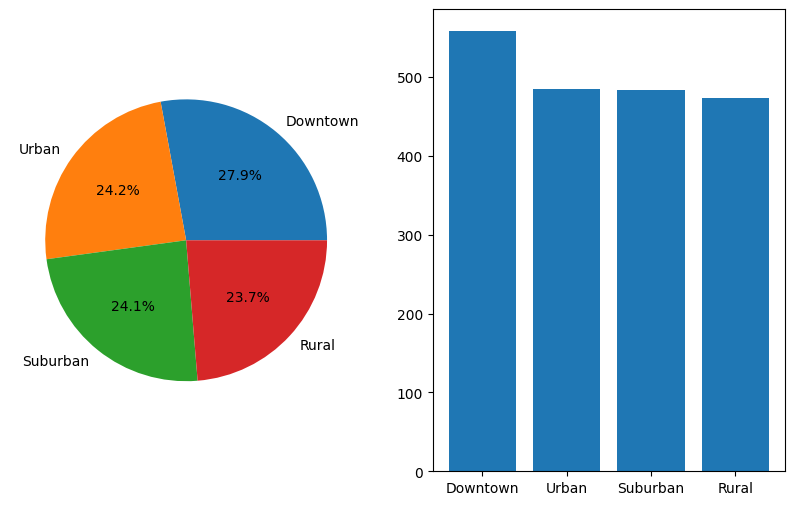

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Vẽ biểu đồ tròn
ax[0].pie(df['Location'].value_counts().sort_values(ascending=False), 
          labels=df['Location'].value_counts().sort_values(ascending=False).index, 
          autopct='%1.1f%%')

# Vẽ biểu đồ cột
ax[1].bar(df['Location'].value_counts().sort_values(ascending=False).index, 
          df['Location'].value_counts().sort_values(ascending=False))

plt.show()


**Nhận  xét**: Nhà ở các khu vực đều có tỉ lệ phân bố như nhau.Khu vực nhiều nhất là khu vực downtown.

**1.2 Condition**

In [19]:
print(df['Condition'].head(5))

0    Excellent
1    Excellent
2         Good
3         Fair
4         Fair
Name: Condition, dtype: object


In [20]:
df['Condition'].value_counts().sort_values(ascending=False)

Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64

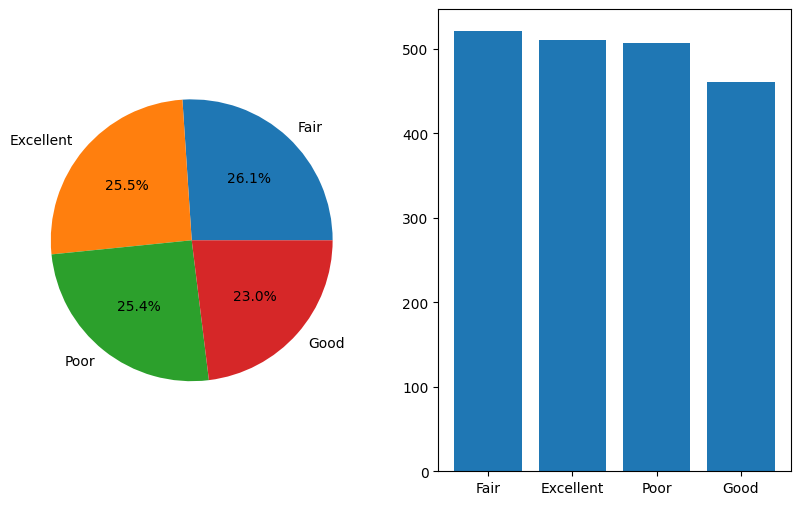

In [21]:
# plot features

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Vẽ biểu đồ tròn
ax[0].pie(df['Condition'].value_counts().sort_values(ascending=False), 
          labels=df['Condition'].value_counts().sort_values(ascending=False).index, 
          autopct='%1.1f%%')

# Vẽ biểu đồ cột
ax[1].bar(df['Condition'].value_counts().sort_values(ascending=False).index, 
          df['Condition'].value_counts().sort_values(ascending=False))

plt.show()

**Nhận xét**: Dữ liệu phân bố đồng đều giữa các điều kiện với nhau

**1.3 Garage**

In [22]:
print(df["Garage"].head(5))

0     No
1     No
2     No
3    Yes
4    Yes
Name: Garage, dtype: object


In [23]:
df['Garage'].value_counts().sort_values(ascending=False)

Garage
No     1038
Yes     962
Name: count, dtype: int64

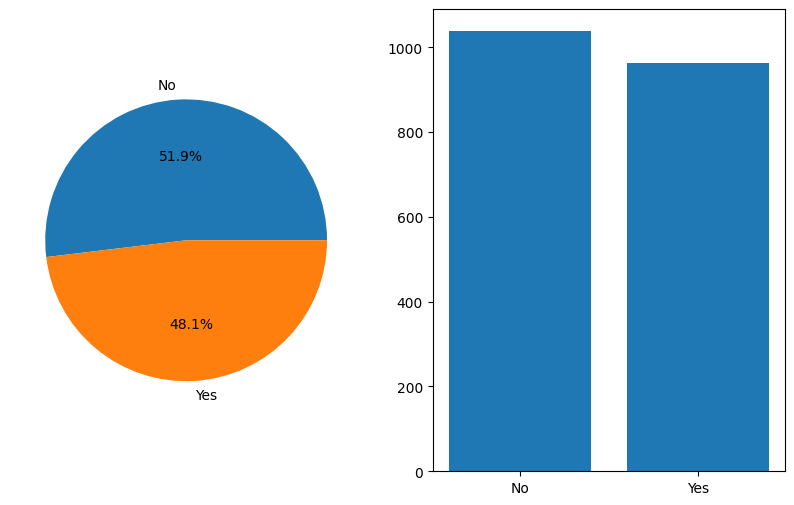

In [24]:
# plot features

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Vẽ biểu đồ tròn 
ax[0].pie(df['Garage'].value_counts().sort_values(ascending=False), 
          labels=df['Garage'].value_counts().sort_values(ascending=False).index, 
          autopct='%1.1f%%')

# Vẽ biểu đồ cột
ax[1].bar(df['Garage'].value_counts().sort_values(ascending=False).index, 
          df['Garage'].value_counts().sort_values(ascending=False))

plt.show()

**Nhận xét**: Với Cột Garage này thể hiện có garage hay không. Dựa vào biểu đồ và số liệu ta thấy được tỉ lể giữa có và không chênh lệch không nhiều chỉ có hơn 3.8% cho No.

**2. numerical features**

**2.1 ID**

In [25]:
print(df['Id'].head(5))

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64


**Nhận xét**: cột 'Id' chỉ thể hiện số thứ tự của từng căn nhà, gần như không có giá trị trong huấn luyện mô hình học máy nên chúng ta sẽ không đưa cột này vào huấn luyện mô hình.

**2.2 Area**

In [26]:
print(df['Area'].head(5))

0    1360
1    4272
2    3592
3     966
4    4926
Name: Area, dtype: int64


In [27]:
df['Area'].describe()

count    2000.000000
mean     2786.209500
std      1295.146799
min       501.000000
25%      1653.000000
50%      2833.000000
75%      3887.500000
max      4999.000000
Name: Area, dtype: float64

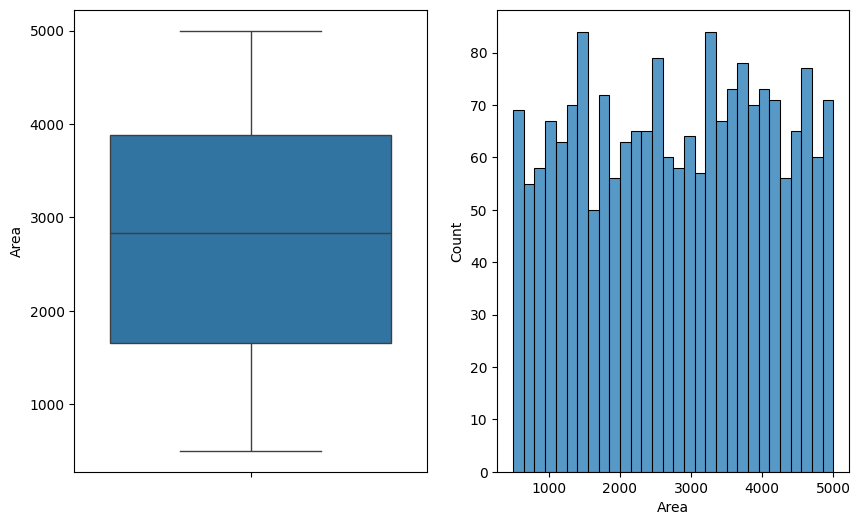

In [28]:
# plot feature
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# vẽ biểu đồ boxplot
sns.boxplot(df['Area'], ax=ax[0])
# Vẽ biểu đồ histogram
sns.histplot(df['Area'], bins=30)
plt.show()

**Nhận xét**:

Cột 'Area' thể hiện thông tin về diện tích căn nhà. Phần lớn các căn nhà có diện tích từ 1000 - 5000 và có phân bố khá đồng đều. Không có giá trị ngoại lai là một điểm cộng cho cột này.

**2.3 Bedrooms**

In [29]:
print(df['Bedrooms'].head(6))

0    5
1    5
2    2
3    4
4    1
5    1
Name: Bedrooms, dtype: int64


In [30]:
df['Bedrooms'].describe()

count    2000.000000
mean        3.003500
std         1.424606
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Bedrooms, dtype: float64

In [31]:
df['Bedrooms'].value_counts().sort_values(ascending=False)

Bedrooms
1    418
3    406
4    405
5    403
2    368
Name: count, dtype: int64

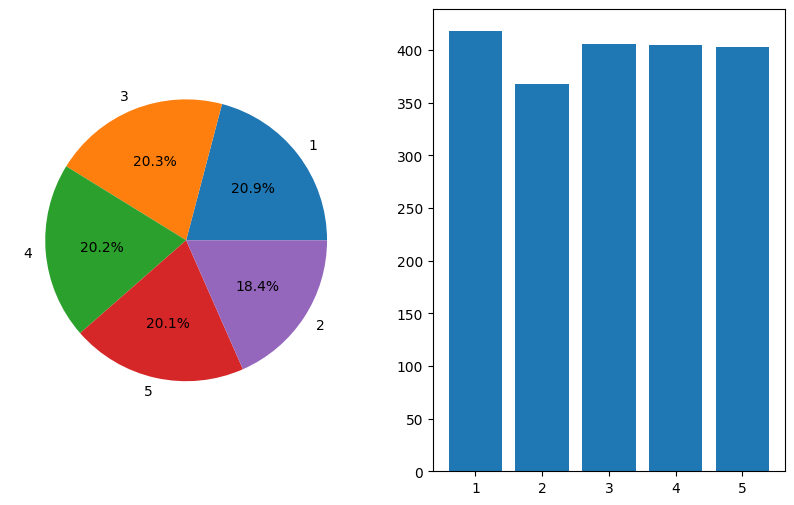

In [32]:
# plot feature

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Vẽ biểu đồ tròn
ax[0].pie(df['Bedrooms'].value_counts().sort_values(ascending=False), 
          labels=df['Bedrooms'].value_counts().sort_values(ascending=False).index, 
          autopct='%1.1f%%')

# Vẽ biểu đồ cột
ax[1].bar(df['Bedrooms'].value_counts().sort_values(ascending=False).index, 
          df['Bedrooms'].value_counts().sort_values(ascending=False))

plt.show()

**Nhận xét :**

Cột 'Bedrooms' thể hiện thông tin về số phòng ngủ của căn nhà. Phần lớn các căn nhà đều có sự phân bố đồng đều với nhau loanh quanh 20%. Trong đó những nhà có hai phòng ngủ ít hơn 2% so với phần còn lại.

**2.4 Bathrooms**

In [33]:
print(df['Bathrooms'].head(5))

0    4
1    4
2    2
3    2
4    4
Name: Bathrooms, dtype: int64


In [34]:
df['Bathrooms'].value_counts().sort_values(ascending=False)

Bathrooms
3    524
4    521
2    494
1    461
Name: count, dtype: int64

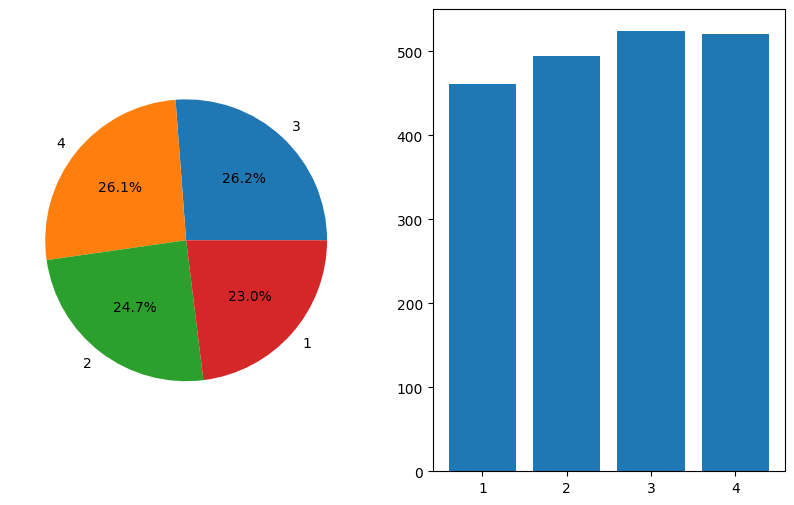

In [35]:
# Plot feature

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Vẽ biểu đồ tròn
ax[0].pie(df['Bathrooms'].value_counts().sort_values(ascending=False), 
          labels=df['Bathrooms'].value_counts().sort_values(ascending=False).index, 
          autopct='%1.1f%%')

# Vẽ biểu đồ cột
ax[1].bar(df['Bathrooms'].value_counts().sort_values(ascending=False).index, 
          df['Bathrooms'].value_counts().sort_values(ascending=False))

plt.show()

**Nhận xét:**

Cột 'Bathrooms' thể hiện thông tin về số phòng tắm của căn nhà. Dựa vào số liệu và biểu đồ, ta nhân thấy được những căn nhà trong dữ liệu có số phòng tắm từ 1 - 4, với phân bố khá đồng đều trong đó ít nhất với 1 phòng tắm 23%.

**2.5 Floors**

In [36]:
print(df['Floors'].head(5))


0    3
1    3
2    3
3    2
4    2
Name: Floors, dtype: int64


In [37]:
df['Floors'].value_counts().sort_values(ascending=False)

Floors
2    691
1    661
3    648
Name: count, dtype: int64

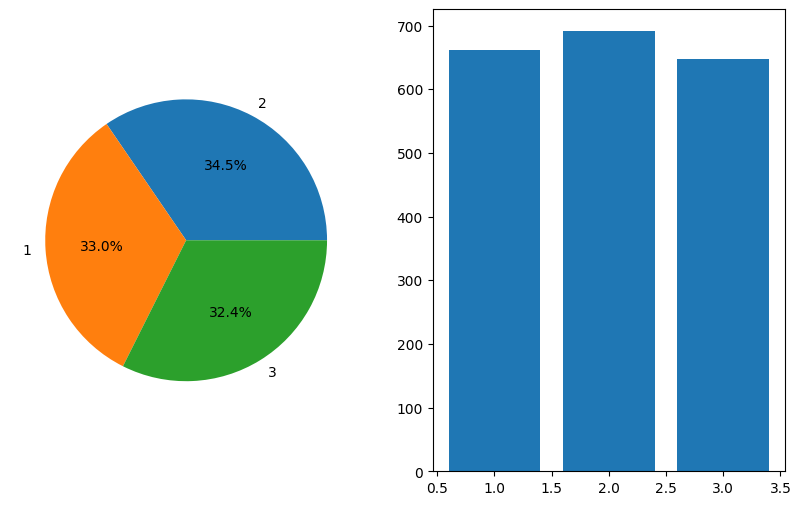

In [38]:
# plot feature

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Vẽ biểu đồ tròn         

ax[0].pie(df['Floors'].value_counts().sort_values(ascending=False), 
          labels=df['Floors'].value_counts().sort_values(ascending=False).index, 
          autopct='%1.1f%%')

# Vẽ biểu đồ cột
ax[1].bar(df['Floors'].value_counts().sort_values(ascending=False).index, 
          df['Floors'].value_counts().sort_values(ascending=False))

plt.show()

**Nhận xét:**

Cột 'Floors' thể hiện thông tin về số tầng của căn nhà. Dựa dữ liệu ta thấy số tầng của các căn nhà trong dữ liệu nằm trong khoảng từ 1 - 3 tầng, với phân bố gần như là đồng đều giữa các tầng.

**2.6 YearBuilds**

In [39]:
print(df['YearBuilt'].head(5))

0    1970
1    1958
2    1938
3    1902
4    1975
Name: YearBuilt, dtype: int64


**Nhận xét:**

Cột 'YearBuilt' thể hiện thông tin về năm xây dựng của căn nhà. Với dữ liệu năm xây ta có thể tìm ra được xây dựng trong bao lâu. Số năm xây dựng là một dữ liệu quan trọng để dự đoán giá của căn nhà.

In [40]:
df['AgeHouse'] = 2024 - df['YearBuilt']
df['AgeHouse'].head(5)

0     54
1     66
2     86
3    122
4     49
Name: AgeHouse, dtype: int64

In [41]:
df['AgeHouse'].describe()

count    2000.000000
mean       62.554000
std        35.926695
min         1.000000
25%        31.000000
50%        63.000000
75%        94.000000
max       124.000000
Name: AgeHouse, dtype: float64

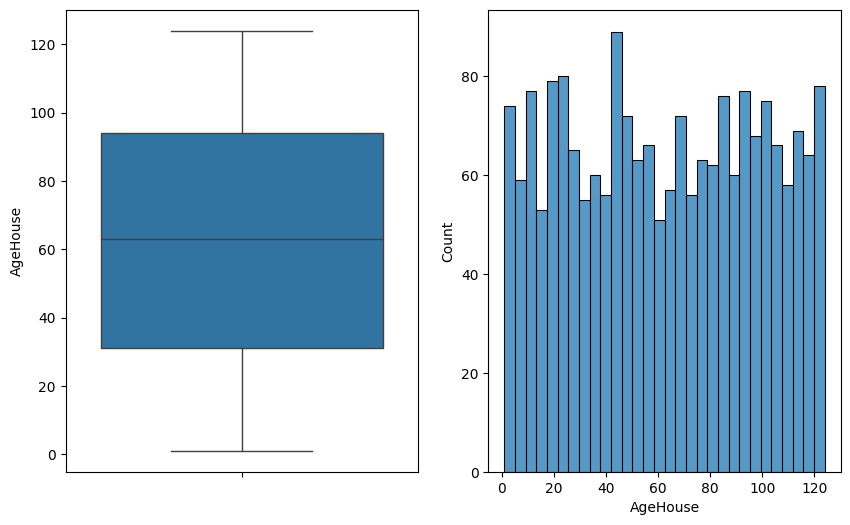

In [42]:
# Plot feature

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Vẽ biểu đồ boxplot
sns.boxplot(df['AgeHouse'], ax=ax[0])
# Vẽ biểu đồ histogram
sns.histplot(df['AgeHouse'], bins=30)
plt.show()

**Nhận xét:**

Phân bố dữ liệu khá đồng đều, không có ngoại lai

**2.7 Price**

In [43]:
print(df['Price'].head(5))

0    149919
1    424998
2    266746
3    244020
4    636056
Name: Price, dtype: int64


In [44]:
df['Price'].describe()

count      2000.000000
mean     537676.855000
std      276428.845719
min       50005.000000
25%      300098.000000
50%      539254.000000
75%      780086.000000
max      999656.000000
Name: Price, dtype: float64

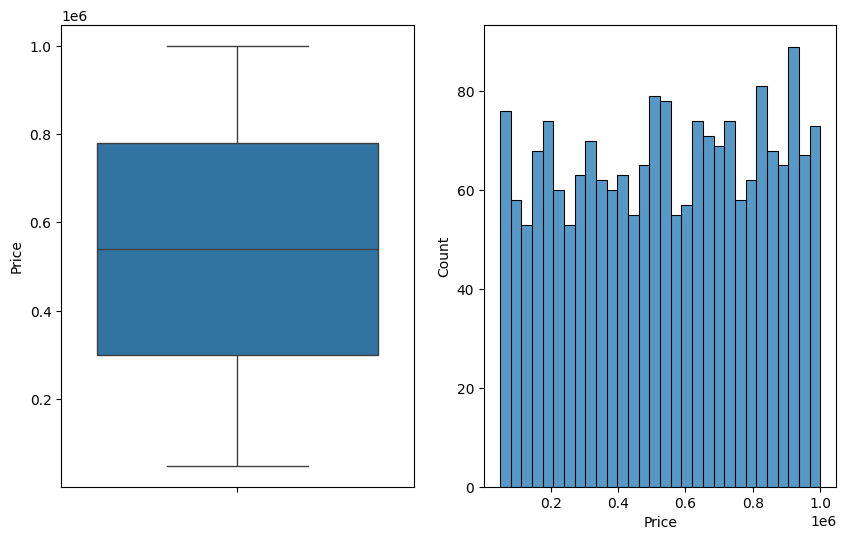

In [45]:
# Plot feature

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# boxplot
sns.boxplot(df['Price'], ax=ax[0])
# histogram
sns.histplot(df['Price'], bins=30)
plt.show()

**Nhận xét:**

- Dữ liệu không có giá trị bị thiếu.
- Không có dữ liệu trùng lặp.
- Phân bố giá trị của các cột tương đối đồng đều.


**Ma trận tương quan**

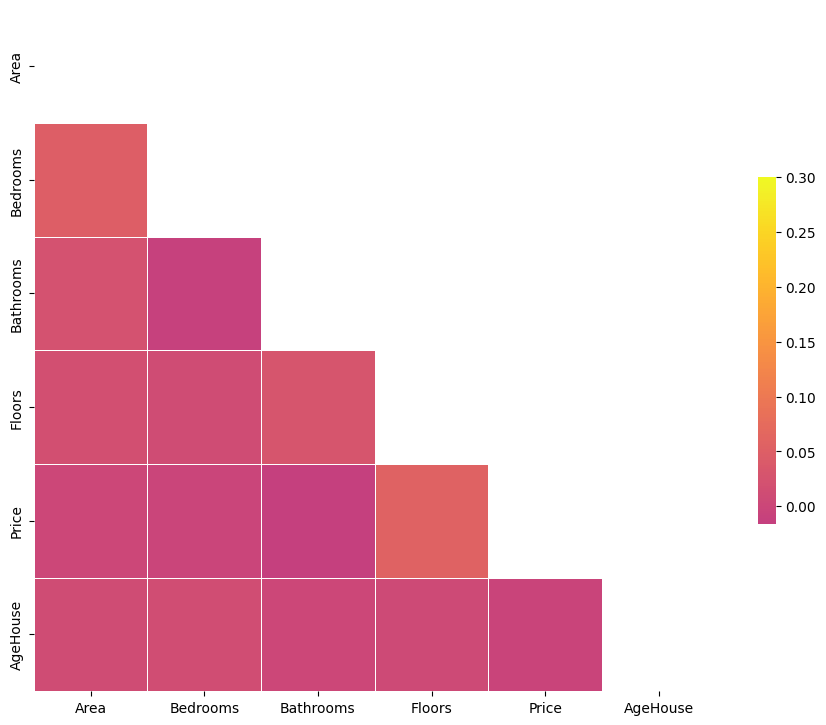

In [46]:
# create the correlation matrix

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.drop('Id', axis=1, inplace=True)
df_num.drop('YearBuilt', axis=1, inplace=True)

corr = df_num.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap= 'plasma', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Split the data

In [47]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price', 'AgeHouse'],
      dtype='object')

In [48]:
# Categories columns
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['Location', 'Condition', 'Garage'], dtype='object')


In [49]:
# encode categorical features
labels1 = {'Downtown': 0,
           'Urban' :1,
           'Suburban': 2,
            'Rural': 3}

labels2 = {
    'Excellent': 0,
    'Good': 1,
    'Fair': 2,
    'Poor': 3
}

labels3 = {
    'Yes': 1,
    'No': 0
}

df['Location'] = df['Location'].map(labels1)
df['Condition'] = df['Condition'].map(labels2)
df['Garage'] = df['Garage'].map(labels3)

In [50]:
feature = ['Location', 'Condition', 'Garage', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'AgeHouse']
target = ['Price']

X = df[feature]
y = df[target]

In [51]:
X.dtypes

Location     int64
Condition    int64
Garage       int64
Area         int64
Bedrooms     int64
Bathrooms    int64
Floors       int64
AgeHouse     int64
dtype: object

In [52]:
X.isnull().sum()

Location     0
Condition    0
Garage       0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
AgeHouse     0
dtype: int64

In [53]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training features shape:', X_train.shape)
print('Testing features shape:', X_test.shape)
print('Training target shape:', y_train.shape)
print('Testing target shape:', y_test.shape)

Training features shape: (1600, 8)
Testing features shape: (400, 8)
Training target shape: (1600, 1)
Testing target shape: (400, 1)


**Features Scaling**

In [54]:
# Starndard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [55]:
# model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# predict
y_pred = model.predict(X_test)

In [57]:
# evaluate
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 78864709711.87729


In [58]:
# print the cofficients
print('Intercept:', model.intercept_)

coeff_df = pd.DataFrame(model.coef_.T, X.columns, columns=['Coefficient'])
print(coeff_df)


Intercept: [536183.7]
            Coefficient
Location    3442.003757
Condition   5296.383965
Garage      1399.196727
Area        -399.544867
Bedrooms     119.878932
Bathrooms -11058.150379
Floors     18900.873349
AgeHouse   -4043.116822


In [59]:
# save the model
import joblib

joblib.dump(model,'model.pkl')

['model.pkl']

**NeuralNetwork**

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [65]:
# transform x, y to tensor

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [66]:
# model
model =  NeuralNetwork()

In [ ]:
# opimezer
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)

# loss function
criterion = nn.MSELoss()

# training loop
epochs = 100

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    prediction =  model(X_train)
    loss = criterion(prediction, y_train)
    # early stop
    if loss.item() < 1:
        break
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 363500732416.0
Epoch: 10, Loss: 363482152960.0
Epoch: 20, Loss: 363401969664.0
Epoch: 30, Loss: 363175903232.0
Epoch: 40, Loss: 362668752896.0
Epoch: 50, Loss: 361693806592.0
Epoch: 60, Loss: 360018706432.0
Epoch: 70, Loss: 357378359296.0
Epoch: 80, Loss: 353489092608.0
Epoch: 90, Loss: 348066021376.0


In [68]:
# Test the model
y_pred = model(X_test)

# evaluate the model

Loss = criterion(X_test, y_test)
print(loss.item())

341652307968.0


C:\Users\dangq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([400, 1])) that is different to the input size (torch.Size([400, 8])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


**Compare with the previous model**

In [78]:
# compare mse of linear regression with loss of neural networl
loss_compare = {}

loss_compare['Linrear Regression'] = int(mse)
loss_compare['Neural Network'] = int(loss.item())

In [79]:
print(loss_compare)

{'Linrear Regression': 78864709711, 'Neural Network': 341652307968}


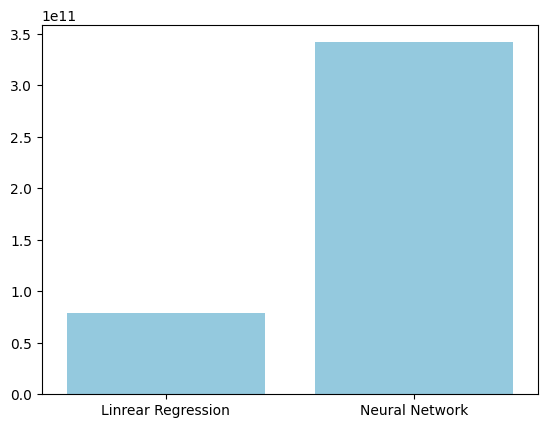

In [80]:
sns.barplot(loss_compare, color= 'skyblue')
plt.show()

**Nhận xét:**

 Với một bộ dữ liệu nhỏ thì thuật toán linear regression thể hiện tốt hơn so với neural network